In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import fit_package


In [137]:
import plot_tools as pt
import analysis_data as ad

In [164]:
# f = 'runlist/dark_rate_0DB_processed'
# f = 'runlist/reference_selftrig_0_processed'
# f = 'runlist/reference_selftrig_1_processed'
# f = 'runlist/reference_selftrig_3_processed'
# f = 'runlist/reference_selftrig_4_processed'
# f = 'runlist/reference_selftrig_5_processed'
# f = 'runlist/reference_selftrig_33nf_1p63_12ns_processed'
# f = 'runlist/reference_selftrig_10nf_1p63_12ns_processed'
# f = 'runlist/reference_selftrig_100nf_1p63V_12ns_processed'
# f = 'runlist/reference_selftrig_1uF_1p4V_50ns_processed'
# f = 'runlist/reference_selftrig_100nF_1p4V_50ns_processed'
# f = 'runlist/reference_selftrig_33nF_1p4V_50ns_processed'
# f = 'runlist/reference_selftrig_10nF_1p4V_50ns_processed'

# f = 'runlist/reference_33nF_DarkRate_processed'
# f = 'runlist/reference_33nF_DarkRate_processed_1'

###---------------------------
# f = 'runlist/reference_33nF_1p36V_1us_LED_processed'

# f = 'runlist/reference_1uF_1p36V_1us_LED_processed'
###------------------
# f  = 'runlist/reference_ext_420nm_led_processed'
# f = 'runlist/reference_selftrig_310nm_3p0V_82ns_processed'
# f  = 'runlist/reference_selftrig_310nm_3p0V_82ns_BP395_processed'
# f = 'runlist/reference_selftrig_254nm_2p8V_82ns_SP395_processed'

####----------------------------
# f = 'runlist/reference_selftrig_3p0V_82ns_310nm_processed'
# f = 'runlist/reference_selftrig_2p8V_53ns_254nm_processed'
# f = 'runlist/reference_ext_420nm_1p36_36ns_processed'



#--------------
# f = 'runlist/reference_ext_254nm_2p8V_53ns_SP395_shortpass_processed'
#### f = 'runlist/reference_ext_310nm_ref_processed'
# f = 'runlist/reference_ext_254nm_ref_processed'
#---------------------------------



###BP395 420nm reference---------
# f = 'runlist/reference_ext_420nm_SP395_ref_processed'
##BP395 420nm filter-----------------------
# f= 'runlist/reference_ext_420nm_SP395_processed'


##### BP200 filter ----------------------------------
# f = 'runlist/reference_ext_420nm_BP200_processed'
#### f = 'runlist/reference_ext_310nm_BP200_processed'
# f=  'runlist/reference_ext_254nm_BP200_processed'

#### BP200 reference
# f = 'runlist/reference_ext_420nm_ref_1_processed'
####f = 'runlist/reference_ext_310nm_ref_1_processed'
f = 'runlist/reference_ext_254nm_BP220_ref_processed'

##310 rerun------------------------------
# f = 'runlist/reference_ext_310nm_BP200_ref_processed'
# f = 'runlist/reference_ext_310nm_BP200_rerun_processed'
# f = 'runlist/reference_ext_310nm_SP395_ref_processed'
# f = 'runlist/reference_ext_310nm_SP395_rerun_processed'
#------------------------
# 254 SP395 rerun check
# f = 'runlist/reference_ext_254nm_SP395_ref_rerun_processed'
# f = 'runlist/reference_ext_254nm_SP395_rerun_processed'

# f = 'runlist/darkrate_veiw_processed'

flist = ad.read_file_names(f)
df = ad.merge_files(flist)
df = df[df.Ch == 0]
df.head()

outnpy/r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250604_run0_raw_b0_seg0.h5py


,Ch,TTT,Baseline,STD,Area,Hight,Width,st,ed,md,WLen,RFOvhight,RunType,Ftag,Wave
0,0,54480,15186,2.537716,5866,2527,11,107,118,112,200,-40,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250...,"[15190, 15185, 15189, 15186, 15190, 15184, 151..."
1,0,304480,15187,1.972308,6841,2640,7,107,114,110,200,-19,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250...,"[15185, 15188, 15189, 15188, 15188, 15183, 151..."
2,0,554476,15186,1.959592,8064,2713,9,110,119,113,200,-33,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250...,"[15188, 15187, 15187, 15185, 15190, 15188, 151..."
3,0,804476,15186,2.617250,6482,2293,9,108,117,111,200,-24,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250...,"[15189, 15188, 15184, 15184, 15182, 15186, 151..."
4,0,1054476,15186,2.135416,8447,3020,10,105,115,109,200,-27,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250...,"[15182, 15184, 15183, 15186, 15188, 15189, 151..."


In [165]:
ftag = f.split('/')[1].split('_ext_')[1].split('_processed')[0]
ftag 

'254nm_BP220_ref'

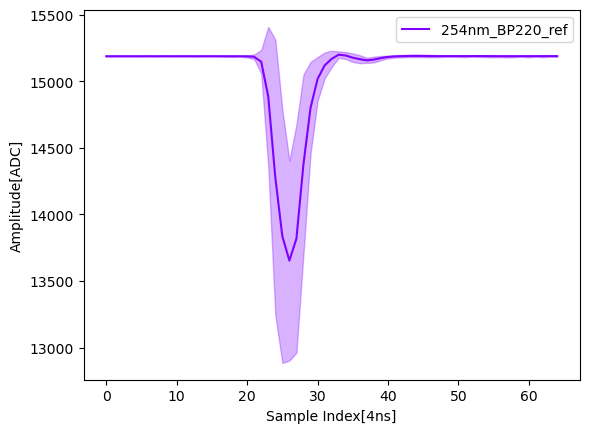

In [166]:
df_w = df.head(1000)
waveforms = np.array(df_w.Wave.tolist())
mean, std = pt.mean_waveforms(waveforms, 85, 150)
pt.plot_waveform(mean, std, 0, ftag)


In [97]:
lengths = df['Wave'].apply(len)
print("唯一长度值:", lengths.unique())

唯一长度值: [200]


In [98]:
max_ttt = df.TTT.max()
min_ttt = df.TTT.min()
delta_ttt = (max_ttt - min_ttt)*4.E-9
(len(df))/delta_ttt, len(df)


(1000.0100366053971, 294976)

In [99]:
# df_ = df[lengths > 1.E4]
# df_1 = df[lengths <= 1.E4 ]
# df_3 = df_1[df_1.Hight < 15000]
# df_3 = df_3[lengths > 2.E2]
# df_4 = df_1[lengths <= 2.E2]
# df_2 = df_1[df_1.Hight >= 15000]
# len(df),len(df_), len(df_1), len(df_2), len(df_3), len(df_4), len( df[df.Hight >= 15000])

In [100]:
# lens = df_4['Wave'].apply(len)
# print("唯一长度值:", lens.unique())

In [153]:
evt_index = 0
df['Wave'].apply(len)[evt_index], df.TTT[evt_index], df.Hight[evt_index]

(200, 11720, 4407)

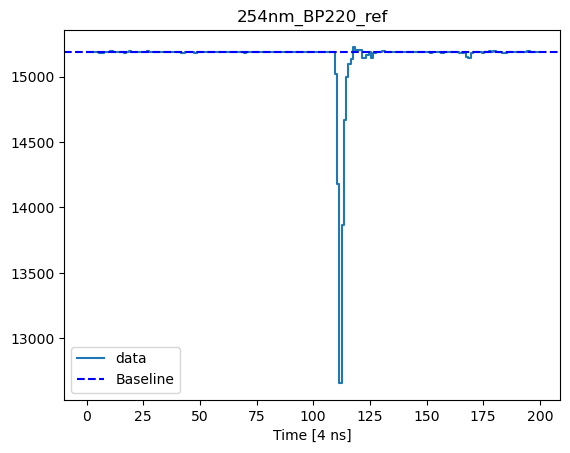

In [168]:
pt.plot_waveform_from_df(df, evt_index, 0, 200, title_str=ftag)

In [12]:
# plt.hist(df.Baseline, bins=100, range=(15100, 15400), alpha=0.5, label='Baseline[ADC]')
# plt.xlabel('Baseline[ADC]')
# plt.yscale('log')
# plt.title('Baseline with Wavelength over 1.E4(499 evts)')
# plt.savefig('figs/ref_33nf_baseline_shifted.png')
# plt.show()

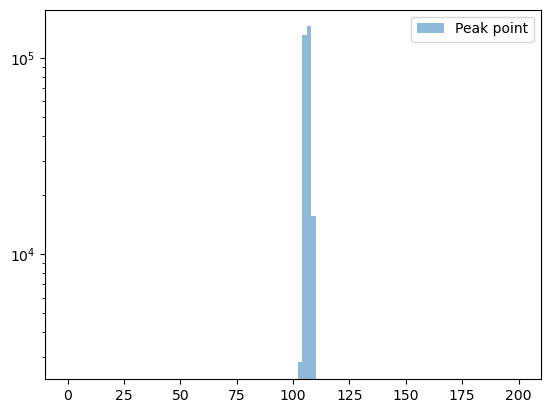

In [64]:
plt.hist(df.md, bins=100, range=(0, 200), alpha=0.5, label='Peak point')
plt.yscale('log')
plt.legend()
plt.show()

In [65]:
# # # ch_selec = df.RFOvhight <=  -10
# # # ch_selec = df.STD <= 6
# # ch_selec = df.Hight >= 2E1
# # ch_sele_ = df.md >= 100
# ch_selec = df.md <= 25
# df = df[ch_selec ]


Fit: mu= 10.40, sigma =-2.08


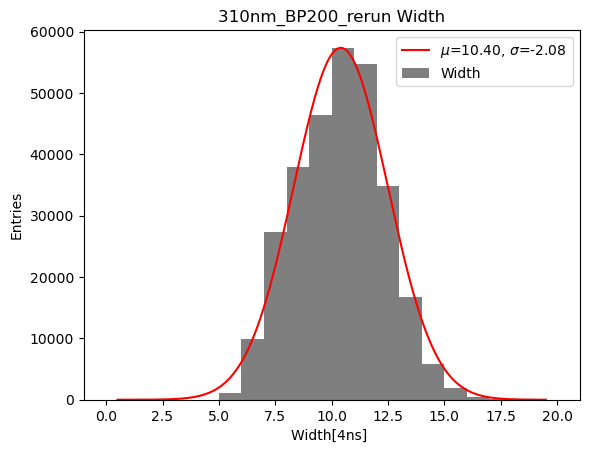

In [155]:

width_mu, width_err = ad.plot_fit_histgram_vs_Gaussion(df.Width, 20, 0, 20, p0=[1.e4, 1.2E1, 1.E1], file_tag=ftag, xlabel='Width[4ns]', title = 'Width', Save=True)

In [105]:
np.max(df.Hight), np.min(df.Hight), len(df.Hight), np.mean(df.Hight), np.std(df.Hight)

(15190, 11185, 294976, 14895.126128905402, 549.2454373594127)

In [36]:
# plt.hist(df.Hight, bins=100, range=(np.min(df.Hight), np.max(df.Hight)), alpha=0.5, label=' Hight')# plt.yscale('log')
# plt.show()



Fit: mu= 4090.29, sigma =552.38


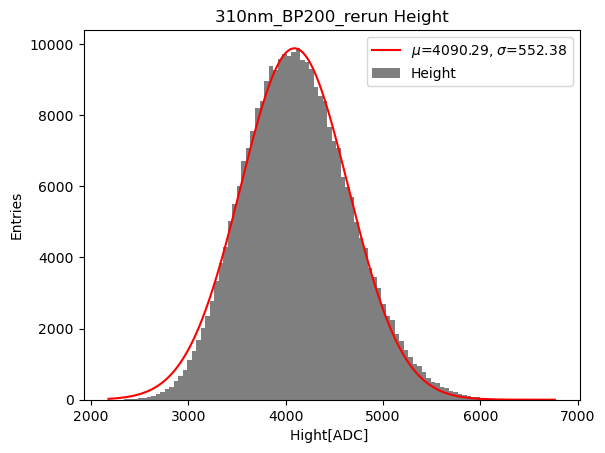

In [156]:

nbins = 100
left_edge, right_edge = np.min(df.Hight), np.max(df.Hight)
p0 = [len(df.Hight), np.mean(df.Hight), np.std(df.Hight)] 
# p0 = [len(df.Hight), right_edge, np.std(df.Hight)] 
xlabel = 'Hight[ADC]'
# hight_mu, hight_err  = ad.plot_fit_histgram_vs_Gaussion(df.Hight, nbins,15150, 15200, p0=p0, file_tag=ftag, xlabel=xlabel, title = 'Height', Save=True)
hight_mu, hight_err  = ad.plot_fit_histgram_vs_Gaussion(df.Hight, nbins,left_edge, right_edge, p0=p0, file_tag=ftag, xlabel=xlabel, title = 'Height', Save=True)


In [38]:
# np.max(df.Area), np.min(df.Area), np.mean(df.Area), np.median(df.Area), np.std(df.Area), len(df.Area)

In [21]:
# plt.hist(df.Area, bins=100, range=(np.min(df.Area),np.max(df.Area)), alpha=0.5, label='Area[ADC]')
# plt.xlabel('Area[ADC]')
# # plt.yscale('log')
# plt.show()

Fit: mu= 11442.08, sigma =1112.26


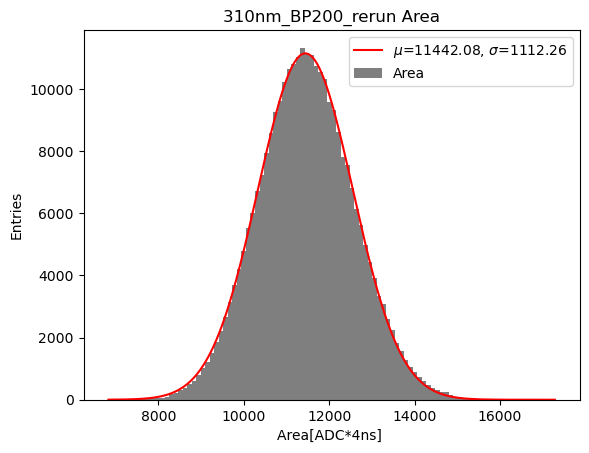

In [157]:
nbins = 100
left_edge, right_edge = np.min(df.Area), np.max(df.Area)
p0 = [len(df.Area), np.mean(df.Area), np.std(df.Area)] 
xlabel = 'Area[ADC*4ns]'
title = 'Area'
area_mu, area_err  = ad.plot_fit_histgram_vs_Gaussion(df.Area, nbins, left_edge, right_edge, p0=p0, file_tag=ftag, xlabel=xlabel, title = 'Area', Save=True)

In [158]:
run_info =[]
run_info.append({
    'width_mu': width_mu,
    'width_err': width_err,
    'hight_mu': hight_mu,
    'hight_err': hight_err,
    'area_mu': area_mu,
    'area_err': area_err,
    'RunType': df.RunType.values[0],
    'FTag': df.Ftag.values[0],    
})

In [159]:
import process_data
df_new = pd.DataFrame(run_info)
f_tag = df.Ftag.values[0]
path = r'outnpy/{}_fitted.h5py'.format(f_tag)
process_data.write_to_hdf5(df_new, path)
    

h5 Write Time: 0.01 s 
h5 File Size: 1.02 MB
Save to outnpy/r8520_base_DC1uF_ext_3p2V_80ns_310nm_BP200_20250605_run2_raw_b0_seg0_fitted.h5py


(0.007267475128173828, 1074092)

In [160]:
df_new

,width_mu,width_err,hight_mu,hight_err,area_mu,area_err,RunType,FTag
0,10.403971,-2.084738,4090.293714,552.377681,11442.081074,1112.256857,DarkRate,r8520_base_DC1uF_ext_3p2V_80ns_310nm_BP200_202...


In [120]:
import pandas as pd
import numpy as np

In [149]:
# f = 'runlist/led_fitted'
# f = 'runlist/led_fitted_BP395'
# f = 'runlist/led_fitted_BP200'
###---------------------
# f = 'runlist/led_BP395_rerun'
f = 'runlist/led_BP200_rerun'
##--------------
# f = 'runlist/led_SP395_rerun'
# f = 'runlist/led_SP395_rerun'

flist = ad.read_file_names(f)
df_f = ad.merge_files(flist)
df_f[:]

outnpy/r8520_base_DC1uF_ext_2p8V_53ns_254nm_BP200_20250604_run0_raw_b0_seg0_fitted.h5py
outnpy/r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250604_run0_raw_b0_seg0_fitted.h5py
outnpy/r8520_base_DC1uF_ext_3p2V_80ns_310nm_BP200_ref_20250605_run1_raw_b0_seg0_fitted.h5py
outnpy/r8520_base_DC1uF_ext_3p2V_80ns_310nm_BP200_20250605_run2_raw_b0_seg0_fitted.h5py
outnpy/r8520_base_DC1uF_ext_1p36V_36ns_420nm_BP200_20250604_run0_raw_b0_seg0_fitted.h5py
outnpy/r8520_base_DC1uF_ext_1p36V_36ns_420nm_ref_20250604_run0_raw_b0_seg0_fitted.h5py


,width_mu,width_err,hight_mu,hight_err,area_mu,area_err,RunType,FTag
0,9.127560,2.540702,737.442372,203.019264,1939.406843,517.973206,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_BP200_202...
1,10.972441,1.486547,2472.297247,393.583126,7073.252627,875.804242,DarkRate,r8520_base_DC1uF_ext_2p8V_53ns_254nm_ref_20250...
2,11.509975,-1.786558,9016.149960,911.693775,24678.611873,1588.877829,DarkRate,r8520_base_DC1uF_ext_3p2V_80ns_310nm_BP200_ref...
3,10.403971,2.084738,4090.293714,552.377681,11442.081073,1112.256857,DarkRate,r8520_base_DC1uF_ext_3p2V_80ns_310nm_BP200_202...
4,11.356822,1.362533,3767.074266,534.045773,9689.945599,1030.207257,DarkRate,r8520_base_DC1uF_ext_1p36V_36ns_420nm_BP200_20...
5,11.945064,1.032004,8069.157080,873.521306,20845.737012,1479.663492,DarkRate,r8520_base_DC1uF_ext_1p36V_36ns_420nm_ref_2025...


In [46]:
ftag = f.split('/')[1]
ftag

'led_SP395_rerun'

In [47]:
area_ratio, area_ratio_err = ad.Area_ratio(df_f)

3.0667717294217045 1.0170636878254642
48.6421927932952 4.026628067363483
3.313123265060844 1.4560934996866743


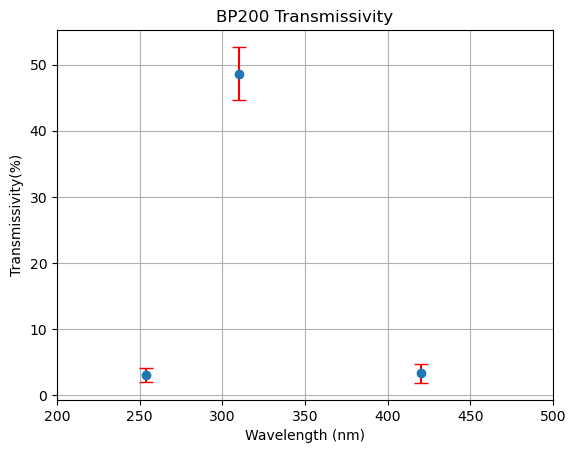

In [49]:
import matplotlib.pyplot as plt
import pickle

# 数据
fig, ax = plt.subplots()
wavelengths = [254, 310, 420]  # 波长，单位nm
plt.errorbar(wavelengths, area_ratio, yerr=area_ratio_err, fmt='o', capsize=5, capthick=1, ecolor='red')
# with open('figs/BP200_shortpass_transmissivity_ref.pkl', 'wb') as f:
    # pickle.dump(fig, f)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmissivity(%)')
plt.title('BP200 Transmissivity')
plt.grid(True)
plt.xlim(200,500)
# plt.ylim(-5,15)
# plt.savefig(r'figs/{}_transmissivity.png'.format(ftag))
plt.show()

(200.0, 500.0)

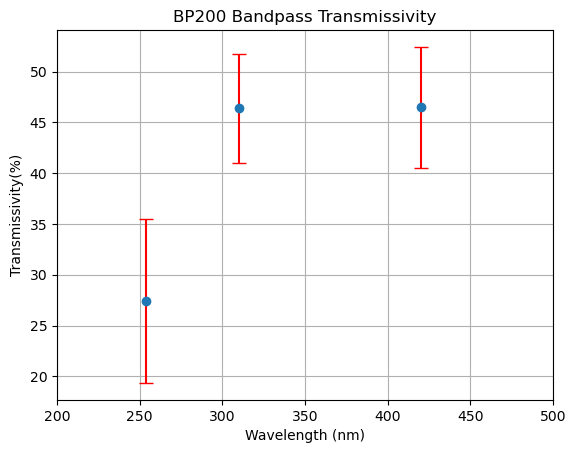

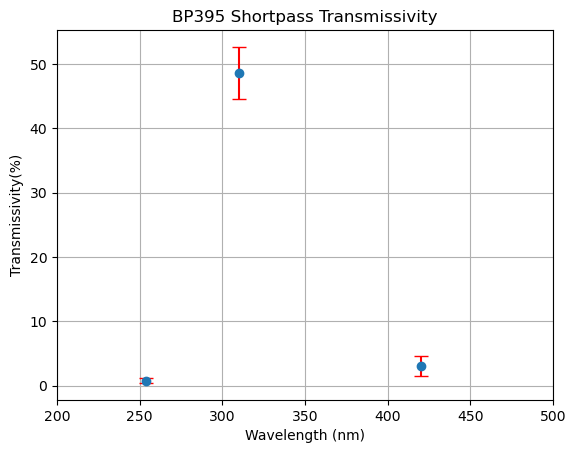

In [244]:
import matplotlib.pyplot as plt
import pickle

# 数据
# fig, ax = plt.subplots()
wavelengths = [254, 310, 420]  # 波长，单位nm
with open('figs/BP200_shortpass_transmissivity_ref.pkl', 'rb') as f:
    bp200= pickle.load(f)
plt.grid(True)
plt.xlim(200,500)
plt.title('BP200 Bandpass Transmissivity')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmissivity(%)')

with open('figs/BP395_shortpass_transmissivity_ref.pkl', 'rb') as f:
    bp395 = pickle.load(f)

# with open('figs/BP200_shortpass_transmissivity_ref.pkl', 'rb') as f:
    # loaded_fig = pickle.load(f)
# loaded_fig.show()

plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmissivity(%)')
plt.title('BP395 Shortpass Transmissivity')
plt.grid(True)
plt.xlim(200,500)
# plt.ylim(-10,100)
# # plt.savefig('figs/BP395_shortpass_transmissivity.png')
# plt.show()

In [ ]:
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [138]:
import numpy as np

def generate_waveform(t_array, sigma,tau):
    """
    生成随时间变化的电压波形
    
    参数：
    t_array : numpy数组 - 时间序列（单位：秒）
    sigma   : float    - 高斯部分宽度参数（单位：秒）
    tau     : float    - 指数衰减时间常数（单位：秒）
    
    返回：
    V       : numpy数组 - 电压波形（单位：伏特）
    """
    # 基础常数定义
    R = 50.0       # 基础电阻（Ω）
    A = 5e-3       # 幅度系数（V）
    Ne = 5.6e6     # 电子数
    # e = 1.6e-19    # 电子电荷（C）
    
    # t_rise = 3
    # sigma = 1.69/t_rise
    
    # 派生参数计算
    q = Ne                  # 总电荷量（C）
    R_prime = (A * R) / q       # 修正电阻参数（V·s/C）
    # t_prime = (sigma**2) / tau  # 分界时间（s）
    C = np.exp(0.5*(sigma/tau)**2)  # 连续性常数
    
    # 波形生成
    V = np.zeros_like(t_array)
    
    # 高斯部分 (t <= t')
    t_prime = 10e-9
    mask = t_array <= t_prime
    V[mask] = q * R_prime * np.exp(-0.5*(t_array[mask]/sigma)**2)
    
    # 指数衰减部分 (t > t')
    mask = t_array > t_prime
    shifted_t = t_array[mask] - t_prime  # 保证时间连续性
    V[mask] = (q * R_prime / C) * np.exp(-shifted_t/tau)
    
    return V

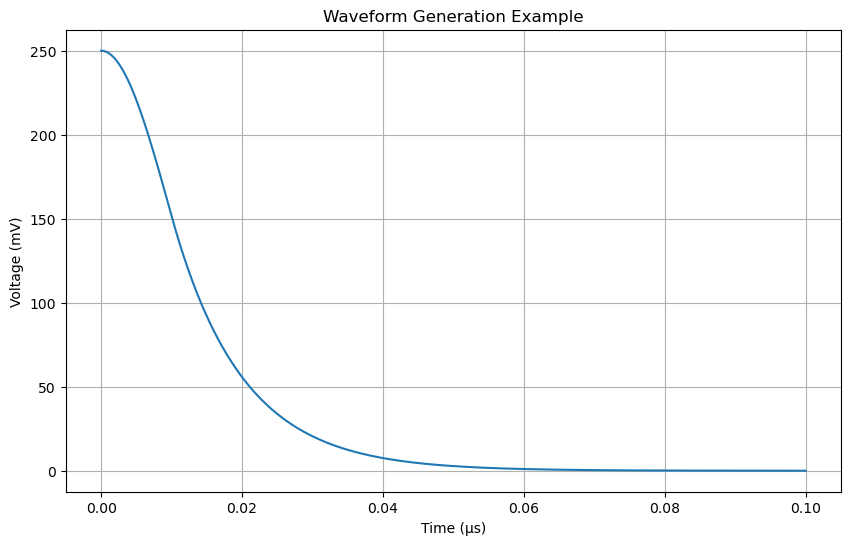

In [139]:
import matplotlib.pyplot as plt

# 参数设置
sigma = 10e-9    # 1微秒
tau = 10e-9      # 2微秒
t = np.linspace(0, 100e-9, 1000)  # 时间范围0-5微秒

# 生成波形
V = generate_waveform(t,sigma,  tau)

# 可视化
plt.figure(figsize=(10,6))
plt.plot(t*1e6, V*1e3)  # 时间转微秒，电压转毫伏
plt.xlabel('Time (μs)')
plt.ylabel('Voltage (mV)')
plt.title('Waveform Generation Example')
plt.grid(True)
plt.show()

In [ ]:
runlist/reference_selftrig_0_processed